# Frasier Dialog Analysis
-----
This project contains several functions that manipulate script data from every season of the hit NBC sitcom "Frasier".

In [3]:
import csv
import numpy as np
import re
from IPython.display import Image
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook, export_png
from bokeh.models import NumeralTickFormatter, LabelSet, Label, Legend, Title
from bokeh.layouts import gridplot

output_notebook(hide_banner=True)
filename = 'script.csv'
fileobj = open(filename, 'r')
readerobj = csv.reader(fileobj)
data = []
for r in readerobj:
    data.append(r)
fileobj.close()
temp = np.asarray(data)
script = temp[1:,:]

-----
## Functions

In [4]:
def strip_season(col):
    season = re.sub("[/]", " ", col).split()
    return season[4]

def strip_episode(col):
    season = re.sub("[/]", " ", col).split()
    path = str(season[4]) + "/" + str(season[5])
    return path

def namesearch(db,name):
    condition = np.where(db == str(name))[0]
    newlist = db[condition,2]
    output = (str(name),np.size(newlist))
    return output

def seasonrename(num):
    season = re.sub("[_]", " ", num)
    upper = season.capitalize()
    return upper

def linesbyepisode(db,num,name, printer = False):
    season = []
    for i in range(len(db)):
        s = strip_episode(db[i,0])
        season.append(s)
    newarr = np.asarray(season)
    season_cond = np.where(newarr == str(num))[0]
    newlist = db[season_cond,1]
    name_cond = np.where(newlist == str(name))
    name_count = newlist[name_cond]
    percent = (np.size(name_count))/(np.size(newlist))
    convert = '{:.2%}'.format(percent)
    if printer == True:
        return(str(name)+" had "+str(np.size(name_count))+" lines in "
            +str(seasonrename(num))+" ("+str(convert)+" of the total lines)")
    else:
        return np.size(name_count)

def linesbyseason(db,num,name, printer = False):
    season = []
    for i in range(len(db)):
        s = strip_season(db[i,0])
        season.append(s)
    newarr = np.asarray(season)
    season_cond = np.where(newarr == str(num))[0]
    newlist = db[season_cond,1]
    name_cond = np.where(newlist == str(name))
    name_count = newlist[name_cond]
    percent = (np.size(name_count))/(np.size(newlist))
    convert = '{:.2%}'.format(percent)
    if printer == True:
        return(str(name)+" had "+str(np.size(name_count))+" lines in "
            +str(seasonrename(num))+" ("+str(convert)+" of the total lines)")
    else:
        return np.size(name_count)

def totalpercent(ind,totals):
    net = 0
    totalines = np.size(ind[:,1])
    for i in range(len(totals)):
        character = totals[i][0]
        dec = (totals[i][1])/totalines
        percent = '{:.2%}'.format(dec)
        net += dec
        print(str(character)+" delivered "+str(percent)+" percent of the total lines in all 11 seasons")
    remain = 1 - net
    rpercent = '{:.2%}'.format(remain)
    print(str(rpercent)+" of the total lines were delivered by other characters")

def linesperseason(db,name):
    seasonlist = ('season_1','season_2','season_3','season_4','season_5','season_6',
    'season_7','season_8','season_9','season_10','season_11')
    s = []
    n = []
    for i in seasonlist:
        s.append(i)
        n.append(linesbyseason(db,i,str(name)))
    newlist = np.array(n)
    return newlist

-----
## Data Analysis

In [5]:
print(linesbyseason(script,'season_1','Frasier',printer=True))
print(linesbyseason(script,'season_1','Niles',printer=True))
print(linesbyseason(script,'season_1','Roz',printer=True))
print(linesbyseason(script,'season_1','Martin',printer=True))
print(linesbyseason(script,'season_1','Daphne',printer=True))

Frasier had 2192 lines in Season 1 (38.82% of the total lines)
Niles had 795 lines in Season 1 (14.08% of the total lines)
Roz had 312 lines in Season 1 (5.53% of the total lines)
Martin had 813 lines in Season 1 (14.40% of the total lines)
Daphne had 445 lines in Season 1 (7.88% of the total lines)


In [17]:
ftotal = namesearch(script,'Frasier')
ntotal = namesearch(script,'Niles')
mtotal = namesearch(script,'Martin')
dtotal = namesearch(script,'Daphne')
rtotal = namesearch(script,'Roz')
totals = [ftotal,ntotal,mtotal,dtotal,rtotal]

totalpercent(script,totals)

season = []
for i in range(len(script)):
    s = strip_episode(script[i,0])
    season.append(s)
episodes = (sorted(set(episodes), key=episodes.index))

Frasier delivered 32.98% percent of the total lines in all 11 seasons
Niles delivered 15.92% percent of the total lines in all 11 seasons
Martin delivered 11.93% percent of the total lines in all 11 seasons
Daphne delivered 8.20% percent of the total lines in all 11 seasons
Roz delivered 7.40% percent of the total lines in all 11 seasons
23.57% of the total lines were delivered by other characters


-----
# Graphical Analysis

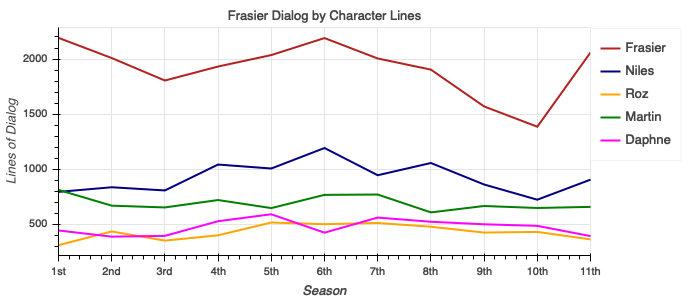

In [7]:
lines_frasier = linesperseason(script,'Frasier')
lines_niles = linesperseason(script,'Niles')
lines_martin = linesperseason(script,'Martin')
lines_roz = linesperseason(script,'Roz')
lines_daphne = linesperseason(script,'Daphne')

szns = [1,2,3,4,5,6,7,8,9,10,11]

p = figure(plot_width=700, plot_height=300,x_range=(1,11))
p.toolbar.logo = None
p.toolbar_location = None

f = p.line(szns,lines_frasier,color="firebrick",line_width=2)
n = p.line(szns,lines_niles,color="navy",line_width=2)
r = p.line(szns,lines_roz,color="orange",line_width=2)
m = p.line(szns,lines_martin,color="green",line_width=2)
d = p.line(szns,lines_daphne,color="magenta",line_width=2)

legend = Legend(items=[
    ("Frasier"   , [f]),
    ("Niles" , [n]),
    ("Roz" , [r]),
    ("Martin" , [m]),
    ("Daphne" , [d])
], location=(0, 95))

p.xaxis[0].axis_label = 'Season'
p.yaxis[0].axis_label = 'Lines of Dialog'
p.xaxis[0].formatter = NumeralTickFormatter(format="Season 0")
p.xaxis[0].ticker.desired_num_ticks = 12

p.add_layout(Title(text="Frasier Dialog by Character Lines", align="center"), "above")

p.add_layout(legend, 'right')

export_png(p, filename="character_dialog.png")

show(p)

Image('character_dialog.png') # workaround to get Bokeh to display in Github (low resolution)

In [22]:
def linesbyep(db,num,name):
    season = []
    for i in range(len(db)):
        s = strip_episode(db[i,0])
        season.append(s)
    newarr = np.asarray(season)
    season_cond = np.where(newarr == str(num))[0]
    newlist = db[season_cond,1]
    name_cond = np.where(newlist == str(name))
    name_count = newlist[name_cond]
    return np.size(name_count)

def linesperepisode(db,name,eplist):
    n = []
    for i in eplist:
        n.append(linesbyep(db,i,str(name)))
    newlist = np.array(n)
    avg = (sum(newlist))/(np.size(newlist))
    return avg
print(linesperepisode(script,'Niles',episodes))
print(linesperepisode(script,'Frasier',episodes))
# print(linesbyepisode(script,'season_3/episode_19','Frasier',printer=True))

38.99616858237548
80.79693486590038


----
Data retrieved from "The Frasier Archive" (kacl780.net), scraped and organized by Kaggle user "sulabhbista"